<a href="https://colab.research.google.com/github/Chrys97/Hamoye/blob/master/Stage_B_Quiz_Trail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **importing relevant modules**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
df = pd.read_csv('/content/drive/My Drive/energydata_complete.csv')
column_names = {'date': 'Date', 'lights': 'Lights', 'T1': 'Kitchen Temperature',
                'RH_1': 'Kitchen Humidity', 'T2': 'Living Room Temperature', 
                'RH_2': 'Living Room Humidity', 'T3': 'Laundry Room Temperature', 
                'RH_3': 'Laundry Room Humidity', 'T4': 'Office Room Temperature', 
                'RH_4': 'Office Room Humidity', 'T5': 'Bathroom Temperature', 
                'RH_5': 'Bathroom Humidity', 'T6': 'Northside Outside Temperature', 
                'RH_6': 'Northside Outside Humidity', 'T7': 'Ironing Room Temperature', 
                'RH_7': 'Ironing Room Humidity', 'T8': 'Teenager Room Temperature', 
                'RH_8': 'Teenager Room Humidity', 'T9': 'Parents Room Temperature', 
                'RH_9': 'Parents Room Humidity', 'To': 'Temperature Outside', 
                'rv1': 'Random Variable 1', 'rv2': 'Random Variable 2'}
df = df.rename(columns = column_names)
df.columns

Index(['Date', 'Appliances', 'Lights', 'Kitchen Temperature',
       'Kitchen Humidity', 'Living Room Temperature', 'Living Room Humidity',
       'Laundry Room Temperature', 'Laundry Room Humidity',
       'Office Room Temperature', 'Office Room Humidity',
       'Bathroom Temperature', 'Bathroom Humidity',
       'Northside Outside Temperature', 'Northside Outside Humidity',
       'Ironing Room Temperature', 'Ironing Room Humidity',
       'Teenager Room Temperature', 'Teenager Room Humidity',
       'Parents Room Temperature', 'Parents Room Humidity', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint',
       'Random Variable 1', 'Random Variable 2'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           19735 non-null  object 
 1   Appliances                     19735 non-null  int64  
 2   Lights                         19735 non-null  int64  
 3   Kitchen Temperature            19735 non-null  float64
 4   Kitchen Humidity               19735 non-null  float64
 5   Living Room Temperature        19735 non-null  float64
 6   Living Room Humidity           19735 non-null  float64
 7   Laundry Room Temperature       19735 non-null  float64
 8   Laundry Room Humidity          19735 non-null  float64
 9   Office Room Temperature        19735 non-null  float64
 10  Office Room Humidity           19735 non-null  float64
 11  Bathroom Temperature           19735 non-null  float64
 12  Bathroom Humidity              19735 non-null 

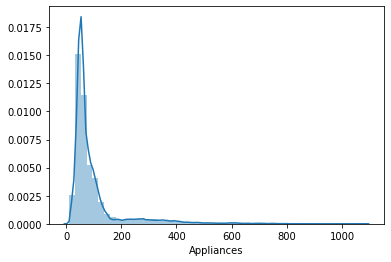

In [12]:
sns.distplot(df['Appliances'])

In [16]:
df = df.drop(columns = ['Date', 'Lights'])

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
featured_df = normalized_df.drop(columns = ['Appliances'])
target_variable = normalized_df['Appliances']

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(featured_df, target_variable,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [22]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_linear = linear_model.predict(x_test)
predicted_linear

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [29]:
from sklearn.metrics import mean_absolute_error
mae_linear = mean_absolute_error(y_test, predicted_linear)

from sklearn.metrics import mean_squared_error
rmse_linear = np.sqrt(mean_squared_error(y_test, predicted_linear))

ssr_linear = np.sum(np.square(y_test - predicted_linear))

from sklearn.metrics import r2_score
r2_linear = r2_score(y_test, predicted_linear)

# **Ridge**

In [25]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.5)
ridge_reg.fit(x_train, y_train)
predicted_ridge = ridge_reg.predict(x_test)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_ridge = mean_absolute_error(y_test, predicted_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, predicted_ridge))
r2_ridge = r2_score(y_test, predicted_ridge)
ssr_ridge = np.sum(np.square(y_test - predicted_ridge))

# **Lasso**

In [27]:
from sklearn.linear_model import Lasso
Lasso_reg = Lasso(alpha = 0.001)
Lasso_reg.fit(x_train, y_train)
predicted_lasso = Lasso_reg.predict(x_test)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_lasso = mean_absolute_error(y_test, predicted_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, predicted_lasso))
r2_lasso = r2_score(y_test, predicted_lasso)
ssr_lasso = np.sum(np.square(y_test - predicted_lasso))

In [35]:
comparison_dict = {'Linear Reg': [mae_linear, rmse_linear, ssr_linear, r2_linear],
                   'Ridge Reg': [mae_ridge, rmse_ridge, ssr_ridge, r2_ridge], 
                   'Lasso Reg': [mae_lasso, rmse_lasso, ssr_lasso, r2_lasso]}
comparison_df = pd.DataFrame(comparison_dict, index = ['mae', 'rmse', 'ssr', 'r2'])
comparison_df.sort_values('Lasso Reg')

,Linear Reg,Ridge Reg,Lasso Reg
r2,0.148902,0.148382,0.026801
mae,0.050134,0.050082,0.055257
rmse,0.087514,0.087541,0.093582
ssr,45.347630,45.375342,51.853367
